 # A-2 Classification en Utilisant TensorFlow et BERT


In [1]:

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Version de TensorFlow :", tf.__version__)
print("Version de TensorFlow Hub :", hub.__version__)


Version de TensorFlow : 2.10.1
Version de TensorFlow Hub : 0.14.0


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


Ce code utilise TensorFlow Hub pour charger deux couches pré-entraînées de BERT  pour le prétraitement et l'encodage de texte en anglais. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
const=200
X_train,X_test,Y_train,Y_test=train_test_split(
    df["text"],
    df["target"],
    test_size=0.15,
    random_state=const)

In [7]:
X_train.head(7)

125     Sometimes you face difficulties not because yo...
4336    Patience Jonathan On The Move To Hijack APC In...
6323    @DareToTaha nah but thinking of getting a stre...
3960    Cuban leader extends sympathy to Vietnam over ...
7238      #Battlefield 1942 forgotten hope secret weapons
1093    Jays rocking #MLB @JoeyBats19 just bombed one ...
6542    @rjkrraj @KarnakaranK @vimvith whether pressur...
Name: text, dtype: object

In [8]:
def embeding(sentences):
    preproc=bert_preprocess(sentences)
    return bert_encoder(preproc)["pooled_output"]  

cette fonction permet de preprocesser et d'encoder un mot. on va utiliser cette fonction que pour analyser brievement les couche pré-entrainéss 

In [9]:
resultat=embeding(["adam","ali","rainning"])

In [10]:
cosine_similarity([resultat[0]], [resultat[1]])

array([[0.9974217]], dtype=float32)

In [11]:
cosine_similarity([resultat[0]], [resultat[2]])

array([[0.86548126]], dtype=float32)

In [12]:
cosine_similarity([resultat[1]], [resultat[2]])

array([[0.8581742]], dtype=float32)

On voit que le cosinus de similarité est plus proche de 1 pour les prenoms contrairement au verbe running

In [13]:
# Bert layers

text_input = tf.keras. layers. Input (shape= (), dtype=tf.string, name="text")

preprocessed_text = bert_preprocess (text_input)

outputs = bert_encoder (preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output', input_shape=(768,))(l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [17]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
    tf.keras.metrics.Precision(name='precision'), 
    tf. keras.metrics. Recall (name= ' recall')
]

model. compile (optimizer="adam",
                loss='binary_crossentropy', 
                metrics=METRICS)

In [18]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
203/203 [==============================] - 2396s 12s/step - loss: 0.6360 - accuracy: 0.6413 - precision: 0.6038 -  recall: 0.4948
Epoch 2/10
203/203 [==============================] - 2940s 14s/step - loss: 0.5990 - accuracy: 0.6852 - precision: 0.6582 -  recall: 0.5652
Epoch 3/10
203/203 [==============================] - 2938s 14s/step - loss: 0.5794 - accuracy: 0.7109 - precision: 0.6893 -  recall: 0.6028
Epoch 4/10
203/203 [==============================] - 2639s 13s/step - loss: 0.5651 - accuracy: 0.7246 - precision: 0.7046 -  recall: 0.6250
Epoch 5/10
203/203 [==============================] - 2219s 11s/step - loss: 0.5604 - accuracy: 0.7214 - precision: 0.7011 -  recall: 0.6196
Epoch 6/10
203/203 [==============================] - 2439s 12s/step - loss: 0.5500 - accuracy: 0.7334 - precision: 0.7174 -  recall: 0.6325
Epoch 7/10
203/203 [==============================] - 2314s 11s/step - loss: 0.5434 - accuracy: 0.7376 - precision: 0.7217 -  recall: 0.6396
Epoch 8/10
20

In [19]:
model.evaluate(X_test,Y_test)

36/36 [==============================] - 398s 11s/step - loss: 0.5103 - accuracy: 0.7662 - precision: 0.8000 -  recall: 0.5823


[0.5103217363357544, 0.7661996483802795, 0.800000011920929, 0.5822784900665283]

In [20]:
Data_test=pd.read_csv("test.csv")

In [21]:
sample=pd.read_csv("sample_submission.csv")

In [22]:
y_predict=model.predict(Data_test["text"])
y_predict_f=y_predict.flatten()

102/102 [==============================] - 1187s 12s/step


In [23]:
y_predict.shape

(3263, 1)

In [24]:
y_predicted_075 = np. where(y_predict_f > 0.75, 1, 0)
y_predicted_050 = np. where(y_predict_f > 0.5, 1, 0)


In [25]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


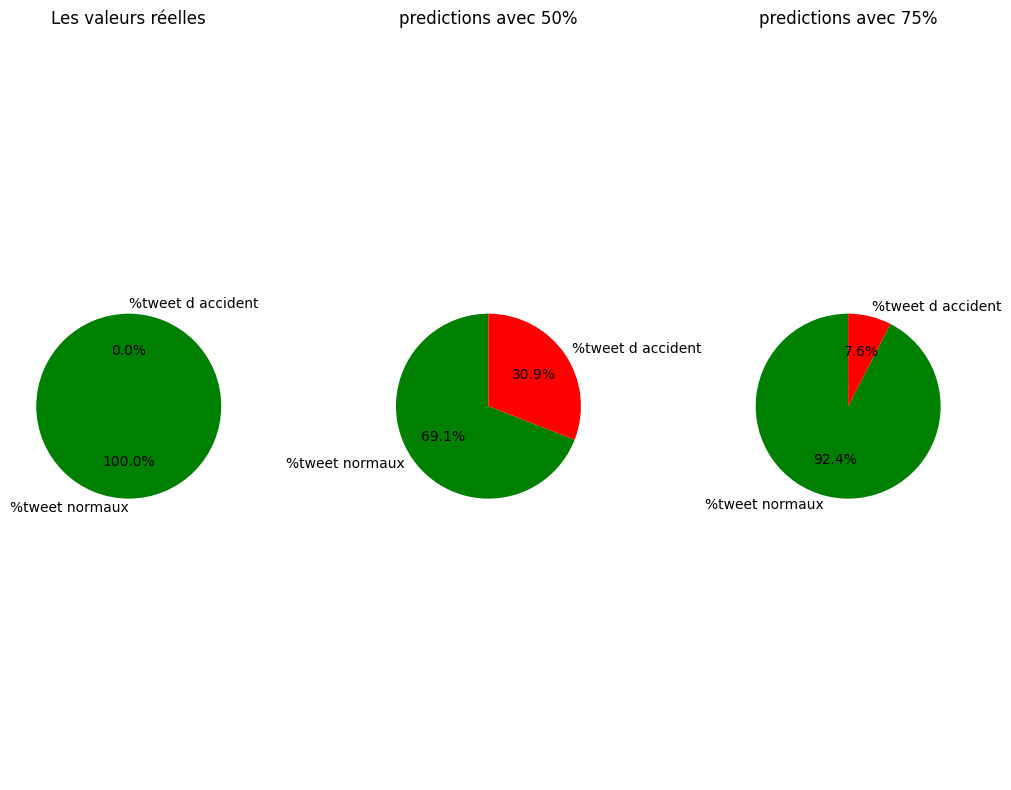

In [26]:
def function0(liste):
    point0=0
    point1=0
    for i in liste:
        if i==0:
            point0=point0+1
        else:
            point1=point1+1
    return point0, point1


total= len(sample)


def function11(data,titre):
    # Données d'exemple
    
    categories = ['pourcentage des tweet normaux', 'pourcentage des tweet d accident']
    pourcentages = [ 100*function0(data)[0]/total, 100*function0(data)[1]/total ]
    couleurs = ['green', 'red']  # Couleurs des secteurs

    # Création du graphique en secteurs
    fig, ax = plt.subplots()
    ax.pie(pourcentages, labels=categories, colors=couleurs, autopct='%1.1f%%', startangle=90)

    # Ajout d'un titre
    ax.set_title(titre)
    
    # Affichage du graphique
    plt.axis('equal')  # Pour un aspect circulaire
    plt.show()


def create_pie_chart(data, titre, ax):
    categories = ['%tweet normaux', '%tweet d accident']
    pourcentages = [100 * function0(data)[0] / total, 100 * function0(data)[1] / total]
    couleurs = ['green', 'red']

    ax.pie(pourcentages, labels=categories, colors=couleurs, autopct='%1.1f%%', startangle=90)
    ax.set_title(titre)
    ax.axis('equal')

# Création de la figure et des sous-graphiques (2 lignes, 2 colonnes)
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

# Premier sous-graphique
create_pie_chart(sample["target"], "Les valeurs réelles", axs[0])

create_pie_chart(y_predicted_050, "predictions avec 50%", axs[1])

create_pie_chart(y_predicted_075, "predictions avec 75%", axs[2])


# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


il faut remarquer que la prédiction est meilleur pour un seuil de 75%, est moyen pour le seuil de 50%.
il semblerait donc évident que le seuil à 75% est meilleur.
toute fois il faut faire attention, car nos données sont malheurerusement toutes classée urgentes,ce qui peut biaiser les données

In [27]:
model.predict(["emergency, a personne have been killed last night "])

1/1 [==============================] - 3s 3s/step


array([[0.46493858]], dtype=float32)

In [28]:
submission_pred=y_predicted_075
submission_final=pd.DataFrame({"id":sample.id,
                          "target":submission_pred,
                        })

In [29]:
submission_final.to_csv("submission_final.csv", index=False)